In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
q1_18 = pd.read_csv('Toronto Bikeshare/Bike Share Toronto Ridership_Q1 2018.csv')
q2_18 = pd.read_csv('Toronto Bikeshare/Bike Share Toronto Ridership_Q2 2018.csv')

Data yang akan digunakan yaitu gabungan Bike Share Toronto Ridership_Q1 2018 dan Bike Share Toronto Ridership_Q2 2018

In [3]:
toronto = [q1_18, q2_18]
df = pd.concat(toronto)
df.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [4]:
df.shape

(736929, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736929 entries, 0 to 558369
Data columns (total 9 columns):
trip_id                  736929 non-null int64
trip_duration_seconds    736929 non-null int64
from_station_id          736929 non-null int64
trip_start_time          736929 non-null object
from_station_name        736929 non-null object
trip_stop_time           736929 non-null object
to_station_id            736929 non-null int64
to_station_name          736929 non-null object
user_type                736929 non-null object
dtypes: int64(4), object(5)
memory usage: 56.2+ MB


In [6]:
df.isnull().sum()

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [7]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,7.369290e+05,736929.000000,736929.000000,736929.000000
mean,2.823652e+06,992.394981,7116.290854,7115.665775
std,2.461467e+05,1714.770271,89.597293,89.672428
min,2.383648e+06,60.000000,7000.000000,7000.000000
25%,2.611914e+06,420.000000,7038.000000,7038.000000
50%,2.827960e+06,662.000000,7092.000000,7089.000000
75%,3.036650e+06,1035.000000,7192.000000,7192.000000
max,3.244395e+06,55077.000000,7324.000000,7324.000000


In [8]:
df['user_type'].value_counts()

Annual Member    597955
Casual Member    138974
Name: user_type, dtype: int64

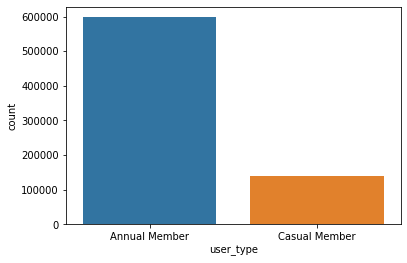

In [9]:
sns.countplot(x='user_type',data=df)

# Find out what percentage of bikes are returned to its initial location?

In [10]:
df.loc[df['from_station_id']==df['to_station_id'],'returned']='return'
df.loc[df['from_station_id']!=df['to_station_id'],'returned']='no_return'

In [11]:
returning = df.groupby('returned').agg('count')
returning

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
returned,,,,,,,,,
no_return,714751,714751,714751,714751,714751,714751,714751,714751,714751
return,22178,22178,22178,22178,22178,22178,22178,22178,22178


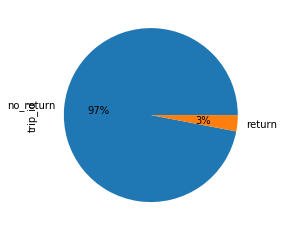

In [12]:
returning['trip_id'].plot.pie(autopct='%0.f%%')

Dari hasil analisis dapat diketahui bahwa hanya 3% sepeda yang dikembalikan ke lokasi awalnya

# MACHINE LEARNING (Classification)

### Feature set 

In [13]:
X= df[['trip_id','trip_duration_seconds','from_station_id','to_station_id']].values
X[0:5]

array([[2383648,     393,    7018,    7176],
       [2383649,     625,    7184,    7191],
       [2383650,     233,    7235,    7021],
       [2383651,    1138,    7202,    7020],
       [2383652,     703,    7004,    7060]], dtype=int64)

In [14]:
y = df['user_type'].values
y[0:5]

array(['Annual Member', 'Annual Member', 'Annual Member', 'Annual Member',
       'Annual Member'], dtype=object)

### Decision Tree

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
from sklearn.tree import DecisionTreeClassifier
user = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
user

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
user.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction

In [20]:
predTree = user.predict(X_testset)

In [21]:
print (predTree [0:5])
print (y_testset [0:5])

['Annual Member' 'Annual Member' 'Annual Member' 'Annual Member'
 'Annual Member']
['Casual Member' 'Annual Member' 'Annual Member' 'Annual Member'
 'Casual Member']


### Evaluation 

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8531565639432058


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
#confusion matrix
confusion_matrix(y_testset, predTree)

array([[174922,   4374],
       [ 28090,  13693]], dtype=int64)

In [27]:
#classification report
print(classification_report(y_testset,predTree))

               precision    recall  f1-score   support

Annual Member       0.86      0.98      0.92    179296
Casual Member       0.76      0.33      0.46     41783

     accuracy                           0.85    221079
    macro avg       0.81      0.65      0.69    221079
 weighted avg       0.84      0.85      0.83    221079



In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_testset,predTree)*100
score

85.31565639432058